In [15]:
import arviz as az
import pymc as pm

import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


from numpyro.diagnostics import hpdi


In [2]:
n_water = 4
n_land = 11

n_elems = n_water+n_land


In [3]:
class GridApproximator:
    def __init__(self, n_land, n_water, n_grid=10):
        self.n_grid = n_grid
        self.grid = np.linspace(0, 1, self.n_grid)
        self.prior = np.ones_like(self.grid)
        self.set_data(n_land, n_water)
        self.fit_grid()

    def set_data(self, n_land, n_water):
        self.n_land = n_land
        self.n_water = n_water
        self.n_tosses = n_land + n_water

    def fit_grid(self):
        self.get_likelihood()
        self.get_posterior()

    def get_likelihood(self):
        self.likelihood = np.array(
            [stats.binom.pmf(self.n_water, self.n_tosses, p) for p in self.grid]
        )

    def get_posterior(self):
        unstd_posterior = self.likelihood * self.prior
        self.posterior = unstd_posterior / np.sum(unstd_posterior)

    def older_get_posterior(self, n_water, n_land, p_water):
        """Don't use this

        Or do - is this a true posterior?"""

        result = math.factorial(n_water + n_land)
        result = result / math.factorial(n_water) / math.factorial(n_land)
        result = result * (p_water**n_water)
        result = result * (1.0 - p_water) ** n_land
        return result

    def plot_posterior(self):
        plt.figure(figsize=(5, 5), facecolor=(1, 1, 1))
        plt.plot(self.grid, self.posterior, ".-")
        plt.xlabel("Probability of water")
        plt.ylabel("Posterior probability")


## Problem 1

Suppose the globe tossing data (Chapter 2) had turned out to be 4 water and 11 land. Construct the posterior distribution, using grid approximation. Use the same flat prior as in the book.

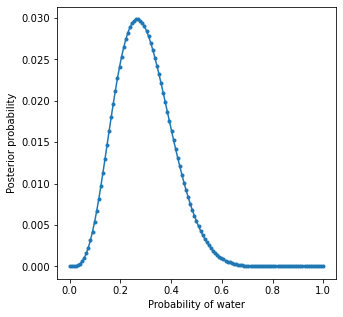

In [4]:
model = GridApproximator(11, 4, n_grid=123)

model.plot_posterior()

## Problem 2

Now suppose the data are 4 water and 2 land. Compute the posterior again, but this time use a prior that is zero below p = 0.5 and a constant above p = 0.5. This corresponds to prior information that a majority of the Earth’s surface is water.

In [5]:
np.heaviside(model.grid-0.5, 0.5)

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. ])

In [6]:
model.prior

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

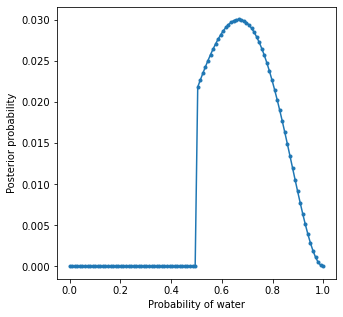

In [7]:
model = GridApproximator(2, 4, n_grid=100)
index = np.where(model.grid < 0.5)
model.prior[index] = 0.0
model.fit_grid()
model.plot_posterior()

## Problem 3

For the posterior distribution from 2, compute 89% percentile and HPDI intervals. Compare the widths of these intervals. Which is wider? Why? If you had only the information in the interval, what might you misunderstand about the shape of the posterior distribution?

In [13]:
np.percentile(model.posterior, 0.89)

0.0

In [16]:
hpdi(model.posterior, prob=0.89)

array([0.        , 0.02901693])

In [10]:
np.random.choice(model.posterior)

0.0

In [11]:
model.posterior

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02185618, 0.02270206, 0.023524  , 0.02431763, 0.02507853,
       0.02580229, 0.02648446, 0.02712065, 0.02770651, 0.02823775,
       0.0287102 , 0.02911981, 0.02946268, 0.02973509, 0.02993354,
       0.03005476, 0.03009579, 0.03005393, 0.02992686, 0.02971262,
       0.02940967, 0.02901693, 0.0285338 , 0.0279602 , 0.02729